# Regressió lineal i descens de gradient

En aquest notebook ensenyarem com un anàlisi de regressió ens permet entendre i preveure el comportament de les dades. A través d'unes mostre es fa un aprenentatge dels valors i la seva correlació.

Els objectius són els següents:
* Aplicar models de regressió, ficant l'èmfasi en: 
    1. Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
    2. Avaluar correctament l'error del model 
    3. Visualitzar les dades i el model resultant
    4. Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones



## Analitzant dades
Davant del conjunt de dades que teim disponibles, primer cal analtzarles i conèixer quins atributs són els més importants, quins tenen correlació entre ells i quins no són importants.

Primer mostrem quins camps hi ha a la base de dades juntament amb el tipus de dades que contenen. També es mostra que d'un total de 506 registres en total, tots els atributs tenen 506 valors. El fet de no tenir valors nuls simplifica el treball al no haver de filtrar o esborrar entrades sense tots els valors.

Tot i estar tots els valors en format de número (ja sigui decimal o enter), més endevant caldrà enstandaritzar-los per tal que tots tinguin el mateix pes durant l'aprenentatge. Més endevant es tractarà aquest tema. 

In [43]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import sklearn as sk
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

import seaborn as sns
import cufflinks as cf
import plotly.offline

import ipywidgets as widgets

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

pd.set_option("display.max_columns", None)

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV']

database = pd.read_csv('housing.csv', delim_whitespace=True, names=names)


database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Per fer-nos una idea de les dades amb les que treballem, primer mostrem les 5 primeres entrades de la base de dades

In [41]:
database.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

Mostrar una descripció de cada un dels atributs també ens ajuda a fer-nos una idea de cadascun d'ells.

In [42]:
database.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

La correlació entre dos atributs ens apropa encara més al nostre objectiu ja que ens permet veure quins estan relacionats entre ells.

A la taula inferior es veu la correlació entre dos atributs. Les cel·les amb fons groc són les que tenen la correlació per sobre de 0.7 i són amb les que, a priori, treballarem.

Cal mencionar que els valors obtinguts poden ser negatius o positius. ja sigui una correlació directa o inversa respectivamet.

In [46]:
def negatives(val):

    if val < 0 :
        color = 'red'
    else:
        color = 'black'
        
    return f'color: {color}'

def undeline(val):
    if abs(val) > 0.7 and abs(val) < 1:
        background = "yellow"
    else:
        background = "None"
        
    return f'background-color:{background}'

database.corr().style.applymap(undeline).applymap(negatives)


La correlació també es pot mostrar d'una forma més gràfica amb la següent imatge:

<IPython.core.display.Javascript object>


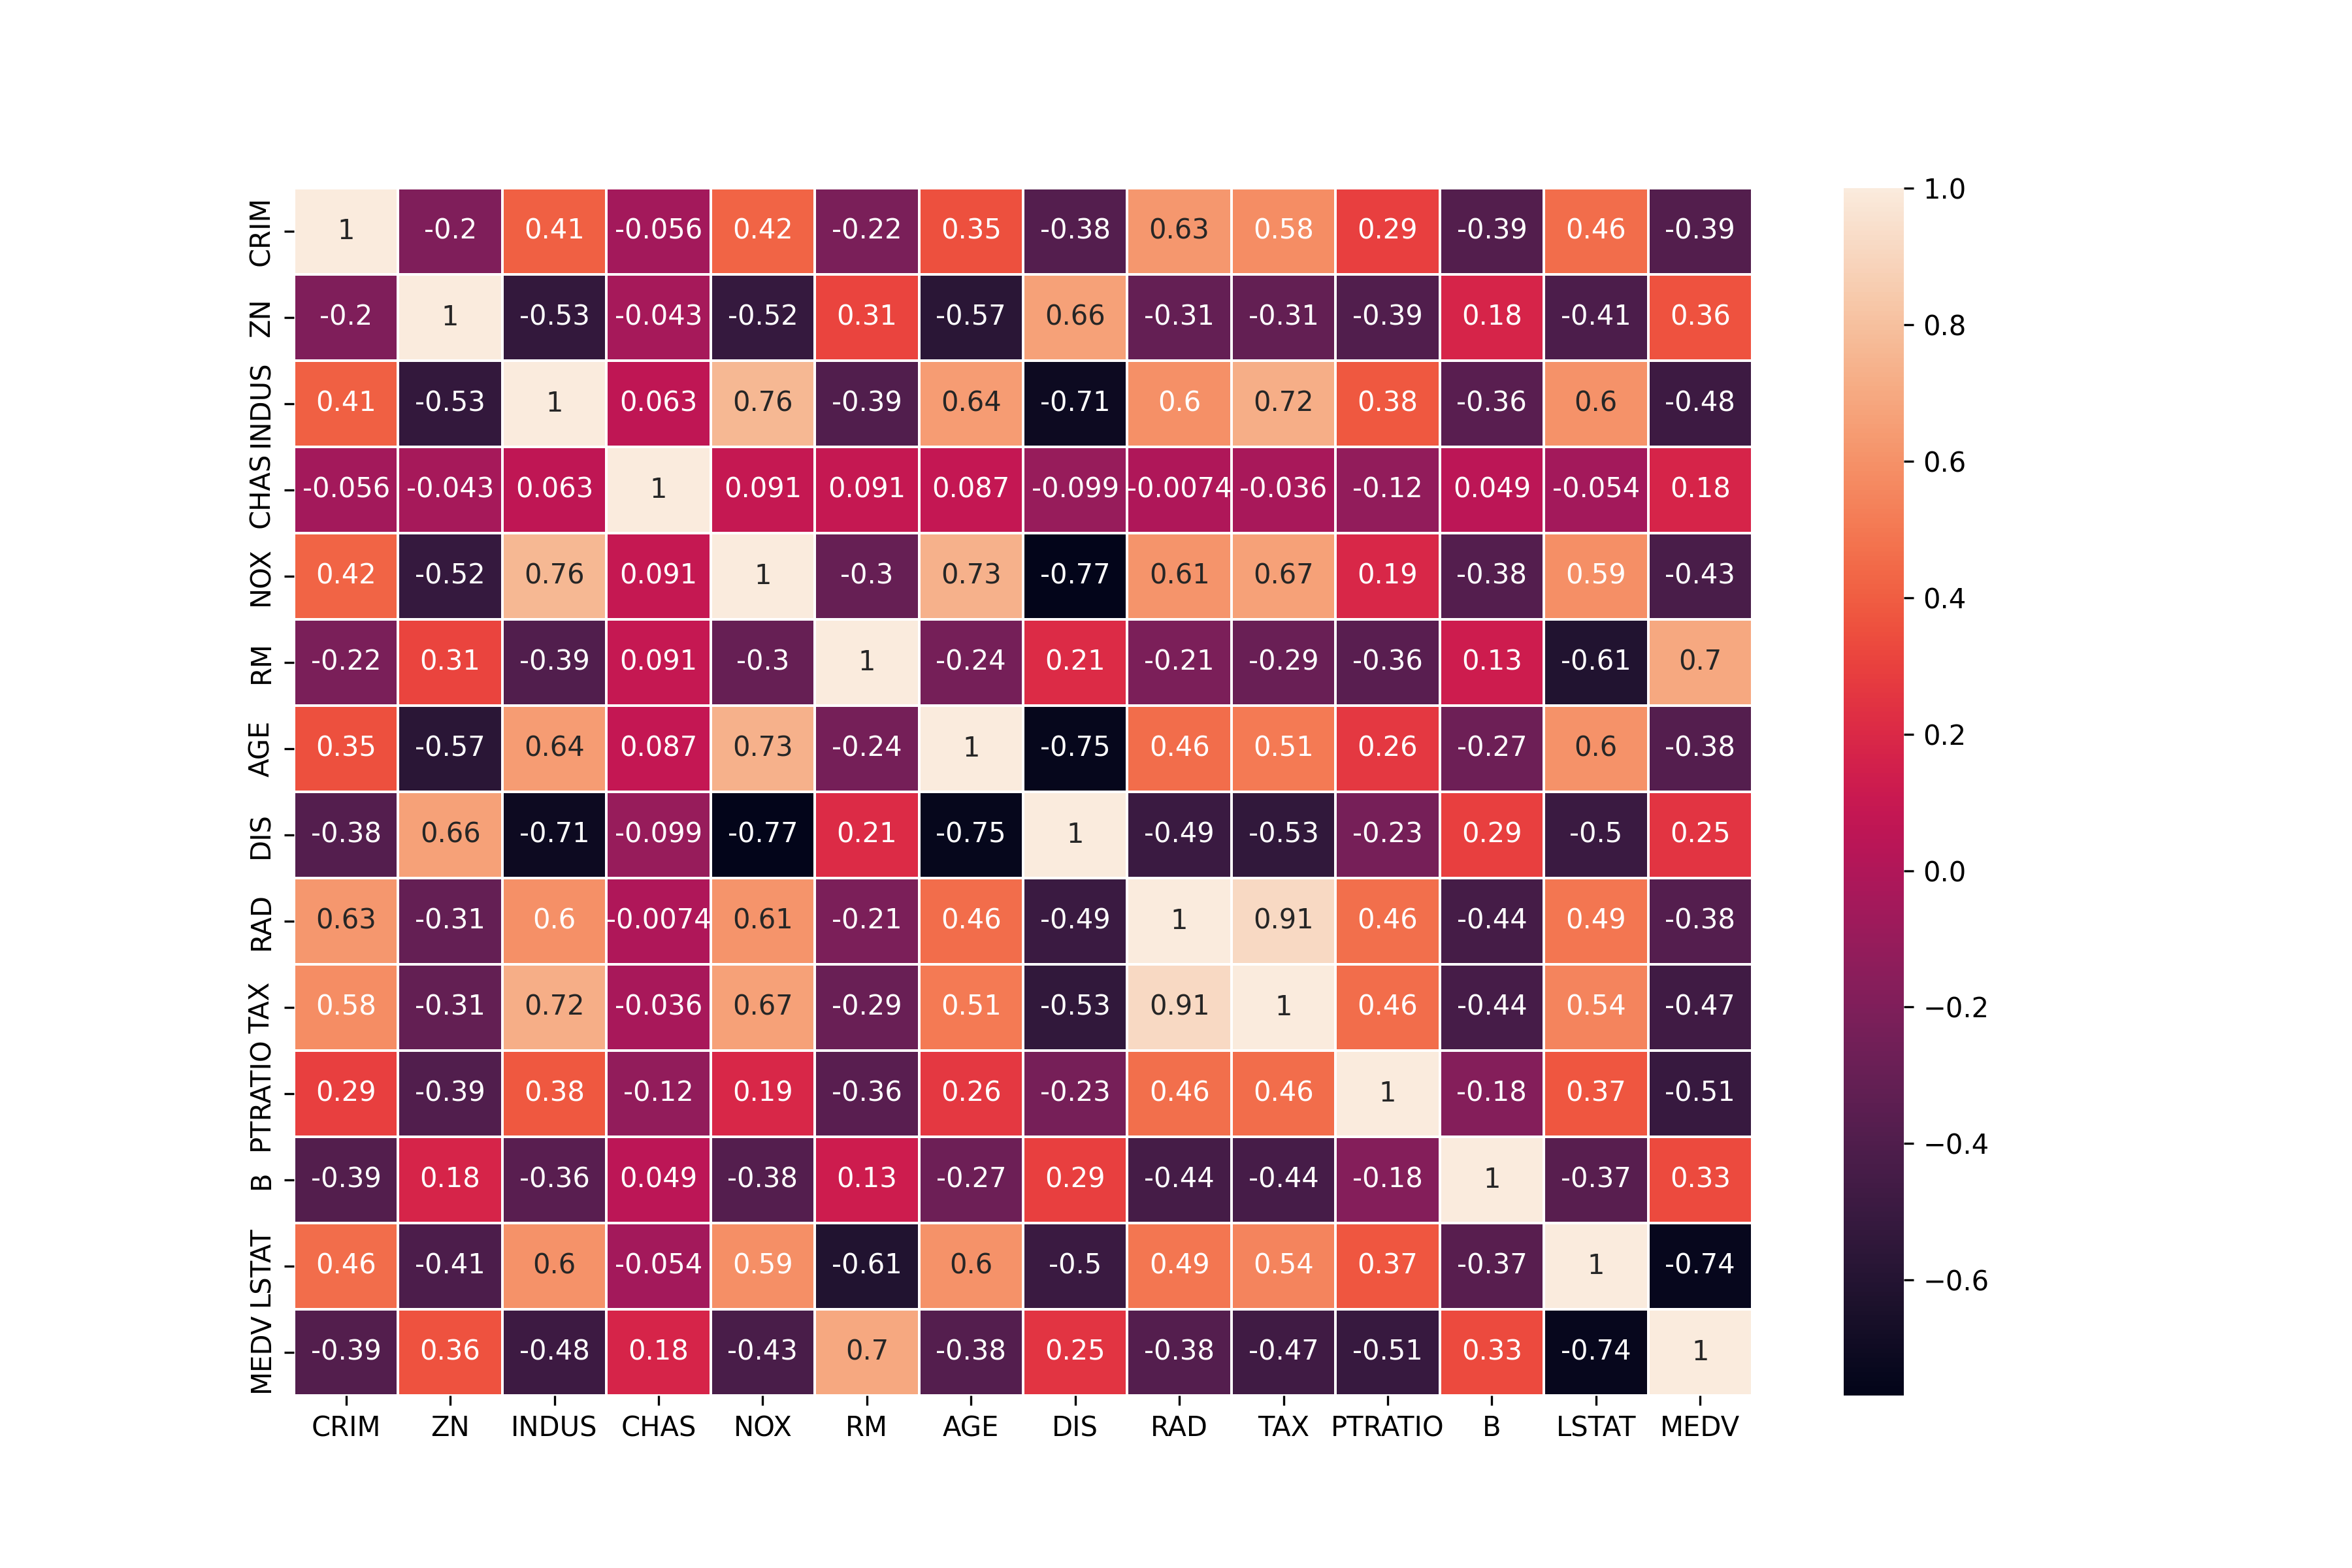

In [47]:
plt.figure(figsize=(12,8), dpi=300)
sns.heatmap(database.corr(), annot=True, linewidths=.5, cmap='rocket');

# mes tipos de paletes de colors: https://seaborn.pydata.org/tutorial/color_palettes.html 

<IPython.core.display.Javascript object>


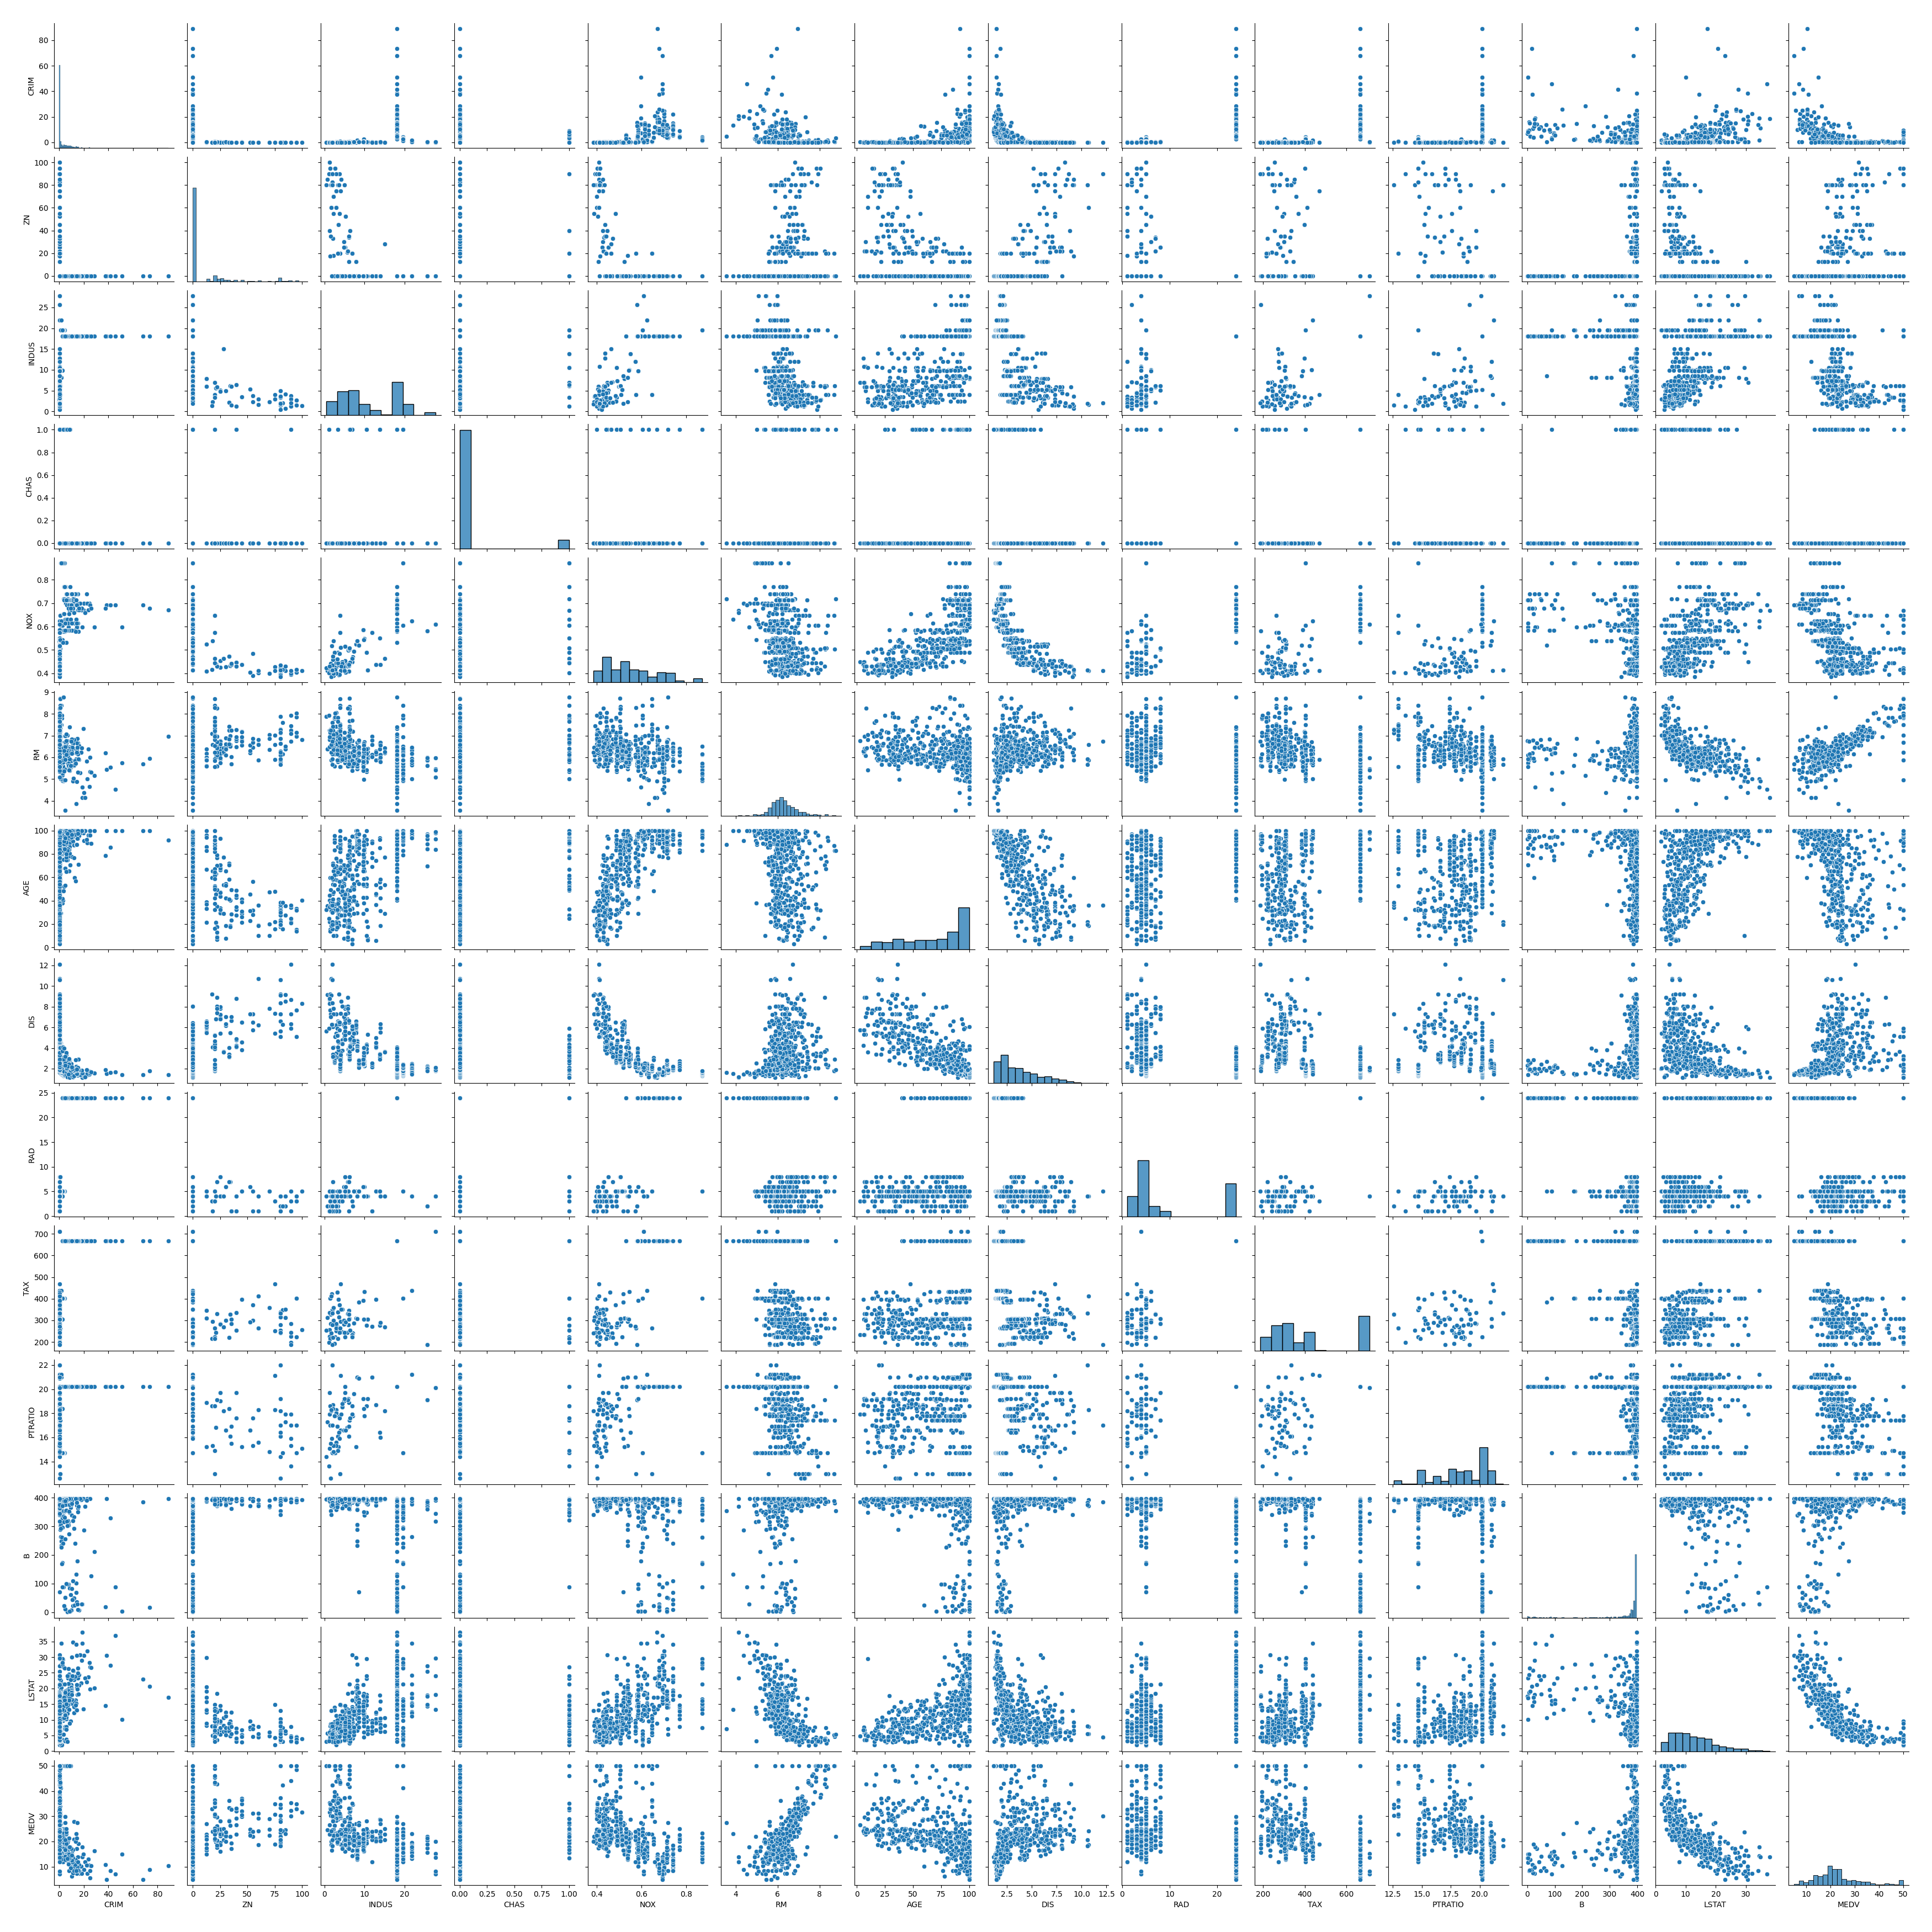

In [31]:
sns.pairplot(database)

In [33]:
toggle = widgets.ToggleButtons(
    options=names, 
    style={"button_width": "130px"},
)

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))

def onClick(obj):
    with out:
        if obj['new']:
            out.clear_output()
            database[obj.new].iplot(kind="box", title=obj.new, boxpoints="all")

display(widgets.Label(value="Escull un per mostrar, el primer cop s'ha de seleccionar un que no sigui CRIM"))
toggle.observe(onClick, 'value')
display(toggle)
display(out)

Label(value="Escull un per mostrar, el primer cop s'ha de seleccionar un que no sigui CRIM")

ToggleButtons(options=('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',…

Output(layout=Layout(border='1px solid black'))

In [34]:

    Quin és el tipus de cada atribut?
    Quins atributs tenen una distribució Guassiana?
    Quin és l'atribut objectiu? Per què?


Object `atribut` not found.
Object `Guassiana` not found.
Object `què` not found.


Primeres regresions

In [35]:
import math

# calcul de l'error cuadratic mitja
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

def mean_squeared_error(database):
    for i in range(0, len(names),2):
        vector1 = np.array(database[names[i]])
        vector2 = np.array(database[names[i+1]])
        
        # comprovem que y1 i y2 tenen la mateixa mida
        assert(len(vector1) == len(vector2))
        resultMse = 0
        resultMse += mse(vector1, vector2)

    return resultMse

print(mean_squeared_error(database))

329.62644328063243


In [36]:


def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

X = database.drop(columns="MEDV")
y = database.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1845)

print ('Training and testing set sizes', X_train.shape, X_test.shape)
regr_boston = LinearRegression()
regr_boston.fit(X_train, y_train) 

print ('\nCoefs (per dim) ', regr_boston.coef_, ' and intercept: ', regr_boston.intercept_)
# Best possible score is 1.0, lower values (even negatives!!) are worse.
print ('\nTraining Score:', regr_boston.score(X_train, y_train) )
print ('Testing Score:', regr_boston.score(X_test, y_test) )
print ('\nTraining MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print ('Testing MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))

Training and testing set sizes (404, 13) (102, 13)

Coefs (per dim)  [-1.21942588e-01  3.72364150e-02  2.72655529e-02  3.10158235e+00
 -1.79082913e+01  4.18063065e+00 -5.80131969e-03 -1.58082749e+00
  3.02006011e-01 -1.30894107e-02 -1.02318767e+00  1.02695918e-02
 -4.78095078e-01]  and intercept:  35.84221860695473

Training Score: 0.7590076094331095
Testing Score: 0.6322347535411479

Training MSE:  21.32652088949429
Testing MSE:  25.109737423651612
